In [7]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

def load_cifar10_batch(filename):
    """ Load a single batch from CIFAR10 """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='bytes')
        X = datadict[b'data']
        Y = datadict[b'labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype('float')
        Y = np.array(Y)
        return X, Y



def load_cifar10(dir):
    """ Load all batches of CIFAR10 """
    #load train batch file
    xs = []
    ys = []

    for i in range(1,6):
        filename = os.path.join(dir, 'data_batch_%d' %i)
        X, Y = load_cifar10_batch(filename)
        xs.append(X)
        ys.append(Y)
    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y


    #load test batch
    Xte, Yte, = load_cifar10_batch(os.path.join(dir,'test_batch'))
    return Xtr, Ytr, Xte, Yte



In [8]:
X_train, Y_train, X_test, Y_test = load_cifar10('cifar-10-batches-py')
print(X_train.shape)
print(Y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [9]:
print(Y_train[:10])

[6 9 9 4 1 1 2 7 8 3]


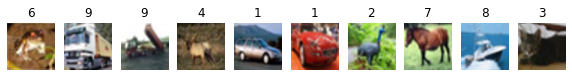

In [12]:
plt.figure(figsize = (10, 5))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].astype('uint8'),interpolation= 'spline16')
    plt.title('%d' % Y_train[i]) 
    plt.axis('off')

In [13]:
print(X_test.shape)
print(Y_test.shape)

(10000, 32, 32, 3)
(10000,)


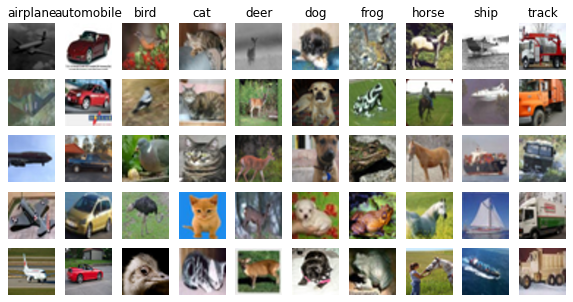

In [19]:
#visualize data
class_names = [ 'airplane' ,'automobile' , 'bird' ,'cat' , 'deer', 'dog','frog', 'horse', 'ship', 'track']

plt.figure(figsize = (10,5))
sample_per_class = 5
num_classes = len(class_names)
for c, class_name in enumerate(class_names):
    idxes = np.flatnonzero(Y_train == c)
    sample_idxes = np.random.choice(idxes, sample_per_class, replace = False)
    for i, idx in enumerate(sample_idxes):
        plt_idx = i*num_classes +c +1
        plt.subplot(sample_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype(np.uint8), interpolation = 'spline16')
        plt.axis('off')
        if i== 0:
            plt.title(class_names[c])